In [270]:
import pandas as pd

In [271]:
data = pd.read_csv('xdata.csv', ';')

In [272]:
data.head()

,Timestamp,610FI001.DACA.PV,610FI005.DACA.PV,610FI015.DACA.PV,610FI017A.PV,610FI017B.PV,610FI017C.PV,610FI020.PV,610FI023A.PV,610FI023B.PV,...,Param1,Param2,Param3,Param4,Param5,Param6,Param7,Param8,Param9,Param10
0,2018-09-28 20:00:00,6767.059487,3915.980352,6488.320318,7378.070513,7401.434551,7368.363223,235425.40625,37094.747564,41896.374375,...,102.480702,999.576371,1002.109174,11.380535,10.892793,77.732925,0.0,51.094552,48.905448,0.0
1,2018-09-29 08:00:00,6765.877464,1327.084508,6491.123816,7378.806800,7398.244902,7363.662715,235425.40625,36857.208869,42294.850312,...,102.480702,999.576371,1002.109174,11.380908,10.889553,77.736564,0.0,51.094552,48.905448,0.0
2,2018-09-29 20:15:00,6770.346529,6255.144424,6486.659397,7379.145501,7398.580645,7364.334297,235425.40625,37815.427267,42395.268750,...,102.480702,999.576371,1002.109174,11.377843,10.888383,77.734026,0.0,51.094552,48.905448,0.0
3,2018-09-30 08:00:00,6775.414762,274.236670,6501.651024,7378.688996,7426.280020,7392.369297,235425.40625,37709.016759,43039.450156,...,102.480702,999.576371,1002.109174,11.378230,10.891634,77.726824,0.0,51.094552,48.905448,0.0
4,2018-09-30 20:00:00,6775.592058,2045.991153,6516.385240,7377.996880,7382.128965,7347.546758,235425.40625,38053.489369,42279.893906,...,102.480702,999.576371,1002.109174,11.380795,10.888861,77.726054,0.0,51.094552,48.905448,0.0


In [273]:
params = data.iloc[:, -10:]
data = data.iloc[:, 7 * 10: 8 * 10]

### Посмотрим пропущенные значения

In [147]:
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]


In [148]:
cols_with_missing

[]

##### Таких значений нет

### Посмотрим среднее значение по столбцам и дисперсию

In [149]:
import matplotlib.pyplot as plt
print(data.shape[1])
len(data.mean(axis=0))

10


10

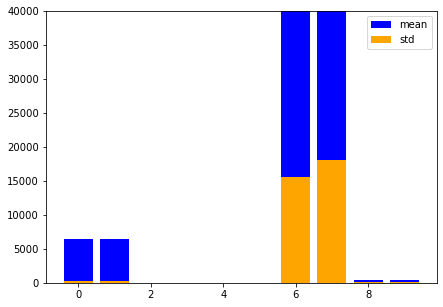

In [154]:

fig, axs = plt.subplots(figsize = (7, 5))
plt.bar(range(data.shape[1]), data.mean(axis=0), color = 'blue', label = 'mean')
plt.bar(range(data.shape[1]), data.std(axis=0), color = 'orange', label = 'std')
axs.legend()
axs.set_ylim([0,40000])

plt.show()

In [178]:
cols_with_zeroes = [col for col in data.columns
                     if data[col].mean() == 0 and data[col].sum() == 0]
cols_with_zeroes # колонки с нулями, можно их удалить

['610FI501A.DACA.PV',
 '610FI501B.DACA.PV',
 '610FI502A.DACA.PV',
 '610FI502B.DACA.PV']

In [179]:
len(cols_with_zeroes) 

4

In [180]:
data = data.drop(cols_with_zeroes, axis = 1)

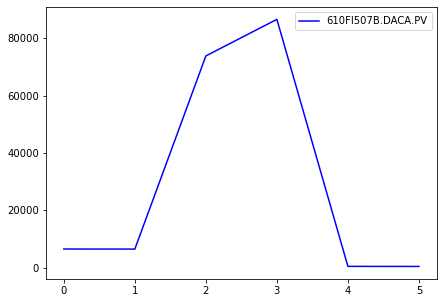

In [221]:
import numpy as np
import scipy.stats as stats


fig, axs = plt.subplots(figsize = (7, 5))
plt.plot(range(len(data.mean())), data.mean(), color = 'blue', label = coloumn)

axs.legend()


plt.show()


#  средние значения по колонкам

### Посмотрим на каждую колонку по отдельности

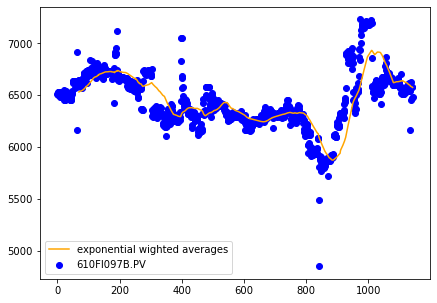

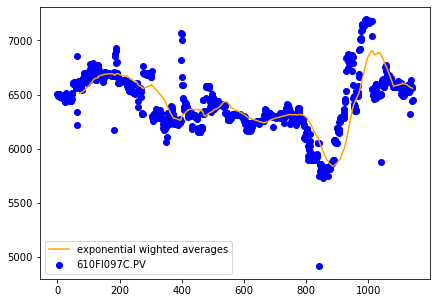

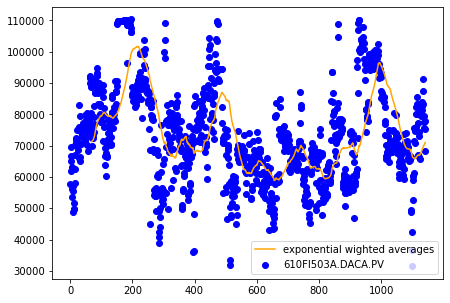

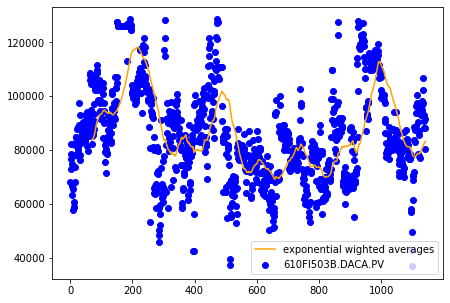

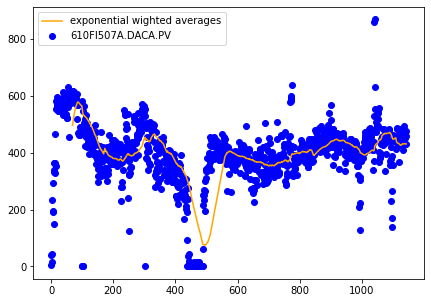

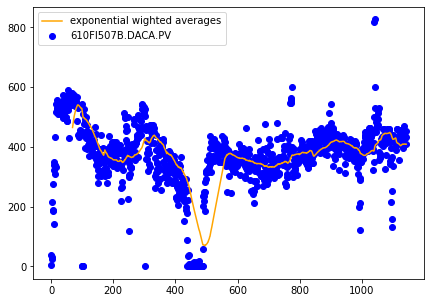

In [194]:
for coloumn in data.columns:
    fig, axs = plt.subplots(figsize = (7, 5))
    plt.scatter(range(data.shape[0]), data[coloumn], color = 'blue', label = coloumn)
    plt.plot(data[coloumn].rolling(window=70).mean(), color = 'orange', label = 'exponential wighted averages')
    axs.legend()
#     axs.set_ylim([0,40000])

    plt.show()

``` Данные достаточно шумные, но экспоненциальное срдневзвешенное показывает общий тренд ```

### Теперь посмотрим на корреляцию столбцов

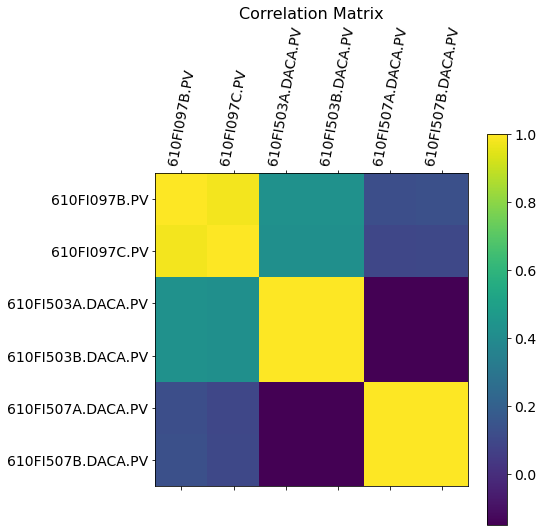

In [200]:
f = plt.figure(figsize=(7, 7))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=80)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

```Заметим, что парные признаки очень сильно коррелируют```

### Общие сведения по таблице

In [225]:
data.describe()

,610FI097B.PV,610FI097C.PV,610FI503A.DACA.PV,610FI503B.DACA.PV,610FI507A.DACA.PV,610FI507B.DACA.PV
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,6450.602363,6427.021563,73820.713546,86579.901863,392.182004,369.070357
std,274.448743,271.586293,15567.389264,18018.299021,121.023096,113.960219
min,4850.408400,4911.923967,31408.440000,36698.347200,0.000000,0.000000
25%,6292.496000,6281.274967,62989.551400,73942.982200,355.892721,334.467361
50%,6411.392000,6397.035869,71704.546400,84264.868400,403.564787,379.113639
75%,6638.821800,6607.877885,83175.160800,97552.098600,452.937820,427.701180
max,7231.714400,7194.208066,110347.570000,128531.586000,869.408262,826.767541


# Обучаем модель

In [263]:
target = pd.read_csv('ts.csv', ';')

In [264]:
target.head()

,Timestamp,ts
0,2018-09-28 20:00:00,0.35
1,2018-09-29 08:00:00,0.20
2,2018-09-29 20:15:00,0.25
3,2018-09-30 08:00:00,0.27
4,2018-09-30 20:00:00,0.21


In [274]:
params

,Param1,Param2,Param3,Param4,Param5,Param6,Param7,Param8,Param9,Param10
0,102.480702,999.576371,1002.109174,11.380535,10.892793,77.732925,0.000000,51.094552,48.905448,0.000000
1,102.480702,999.576371,1002.109174,11.380908,10.889553,77.736564,0.000000,51.094552,48.905448,0.000000
2,102.480702,999.576371,1002.109174,11.377843,10.888383,77.734026,0.000000,51.094552,48.905448,0.000000
3,102.480702,999.576371,1002.109174,11.378230,10.891634,77.726824,0.000000,51.094552,48.905448,0.000000
4,102.480702,999.576371,1002.109174,11.380795,10.888861,77.726054,0.000000,51.094552,48.905448,0.000000
...,...,...,...,...,...,...,...,...,...,...
1138,94.075752,998.127558,1000.669947,31.147695,26.234199,42.891373,1048.287145,54.042557,45.957443,999.372070
1139,93.483876,995.243830,997.805299,32.576837,27.736049,39.810235,1042.244812,54.153218,45.846782,1001.100853
1140,95.815935,1003.736660,1006.241936,32.876959,27.316607,40.080191,1042.213375,54.647882,45.352118,1004.853675
1141,100.104663,997.685317,1000.230632,35.093764,26.287127,38.497456,1040.327198,57.046225,42.953775,1002.255186


### Также посмотрим на признаки

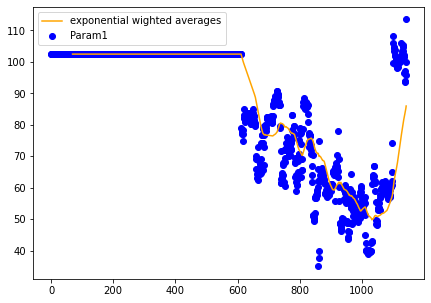

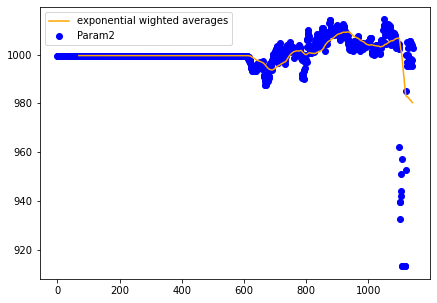

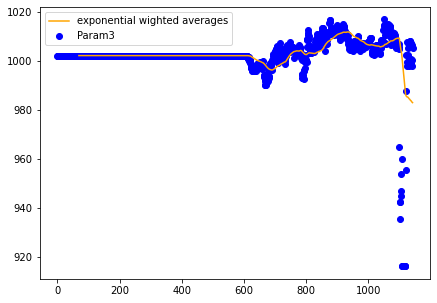

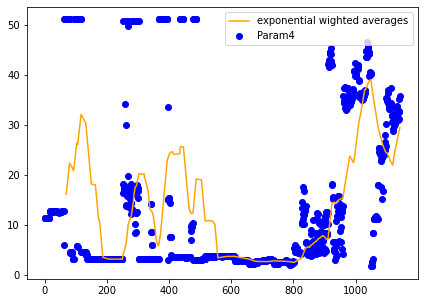

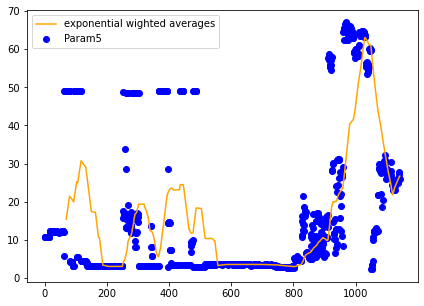

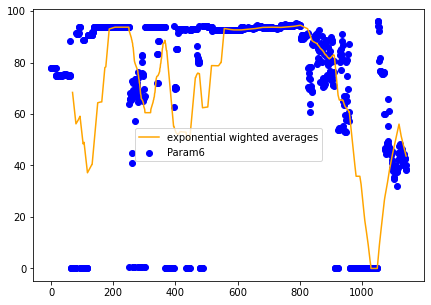

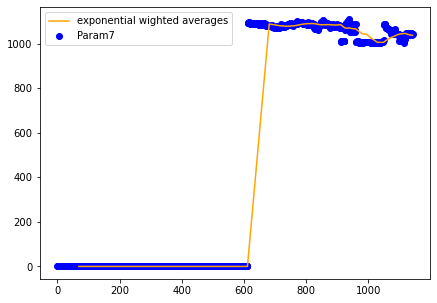

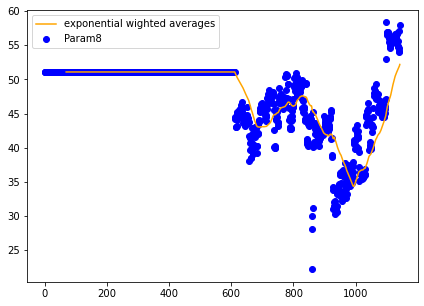

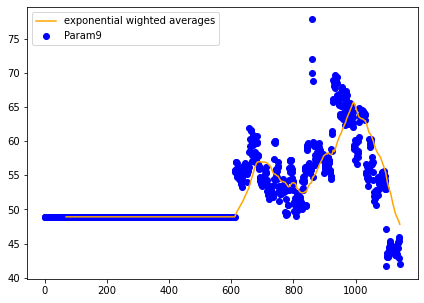

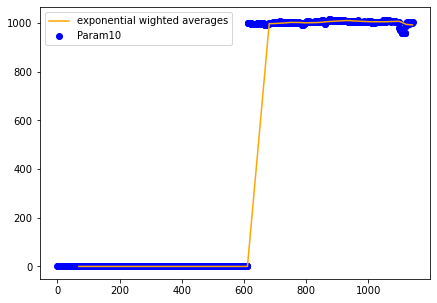

In [275]:
for coloumn in params.columns:
    fig, axs = plt.subplots(figsize = (7, 5))
    plt.scatter(range(params.shape[0]), params[coloumn], color = 'blue', label = coloumn)
    plt.plot(params[coloumn].rolling(window=70).mean(), color = 'orange', label = 'exponential wighted averages')
    axs.legend()
#     axs.set_ylim([0,40000])

    plt.show()

``` Опять же, почти все параметры очень шумные ```

### Взглянем на корреляцию

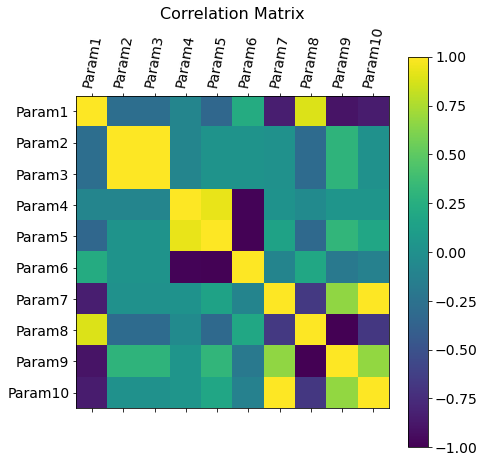

In [276]:
f = plt.figure(figsize=(7, 7))
plt.matshow(params.corr(), fignum=f.number)
plt.xticks(range(params.shape[1]), params.columns, fontsize=14, rotation=80)
plt.yticks(range(params.shape[1]), params.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

```Признак 2 сильно коррелирует с 3, поэтому один из них можно удалить, также с признаками 4 и 5```


In [258]:
params.drop(['Param3', 'Param5'], axis = 1, inplace = True)

#### Разделим данные на train и test

In [259]:
import sklearn.model_selection as sk
X_train, X_test, y_train, y_test = sk.train_test_split(params, \
                                                      target['ts'] , test_size=0.3, random_state=42)

### Обучим CatBoost со стандартными параметрами и кастомной метрикой MAE

In [260]:
from catboost import CatBoostRegressor

In [261]:
model = CatBoostRegressor(custom_metric= 'MAE')
model.fit(
   X_train, y_train,
   eval_set=(X_test, y_test),
)

Learning rate set to 0.044174
0:	learn: 0.1230953	test: 0.1299836	best: 0.1299836 (0)	total: 4.75ms	remaining: 4.75s
1:	learn: 0.1216568	test: 0.1287313	best: 0.1287313 (1)	total: 13.5ms	remaining: 6.71s
2:	learn: 0.1202277	test: 0.1273455	best: 0.1273455 (2)	total: 19.7ms	remaining: 6.56s
3:	learn: 0.1186849	test: 0.1258758	best: 0.1258758 (3)	total: 23.7ms	remaining: 5.9s
4:	learn: 0.1174532	test: 0.1248713	best: 0.1248713 (4)	total: 30ms	remaining: 5.98s
5:	learn: 0.1162780	test: 0.1239225	best: 0.1239225 (5)	total: 33.4ms	remaining: 5.53s
6:	learn: 0.1150069	test: 0.1229117	best: 0.1229117 (6)	total: 37.1ms	remaining: 5.26s
7:	learn: 0.1139495	test: 0.1220187	best: 0.1220187 (7)	total: 40.6ms	remaining: 5.04s
8:	learn: 0.1131682	test: 0.1213940	best: 0.1213940 (8)	total: 43.9ms	remaining: 4.84s
9:	learn: 0.1120158	test: 0.1203426	best: 0.1203426 (9)	total: 58.8ms	remaining: 5.82s
10:	learn: 0.1107839	test: 0.1192614	best: 0.1192614 (10)	total: 64ms	remaining: 5.76s
11:	learn: 0.109

101:	learn: 0.0854177	test: 0.0989146	best: 0.0989146 (101)	total: 351ms	remaining: 3.09s
102:	learn: 0.0853910	test: 0.0988914	best: 0.0988914 (102)	total: 356ms	remaining: 3.1s
103:	learn: 0.0853074	test: 0.0988533	best: 0.0988533 (103)	total: 360ms	remaining: 3.1s
104:	learn: 0.0852566	test: 0.0988231	best: 0.0988231 (104)	total: 363ms	remaining: 3.09s
105:	learn: 0.0851819	test: 0.0987936	best: 0.0987936 (105)	total: 366ms	remaining: 3.09s
106:	learn: 0.0850894	test: 0.0987215	best: 0.0987215 (106)	total: 374ms	remaining: 3.12s
107:	learn: 0.0849884	test: 0.0986859	best: 0.0986859 (107)	total: 378ms	remaining: 3.12s
108:	learn: 0.0849382	test: 0.0986936	best: 0.0986859 (107)	total: 382ms	remaining: 3.12s
109:	learn: 0.0848587	test: 0.0986822	best: 0.0986822 (109)	total: 388ms	remaining: 3.14s
110:	learn: 0.0847353	test: 0.0985871	best: 0.0985871 (110)	total: 394ms	remaining: 3.15s
111:	learn: 0.0845802	test: 0.0984635	best: 0.0984635 (111)	total: 397ms	remaining: 3.15s
112:	learn: 

254:	learn: 0.0753721	test: 0.0937961	best: 0.0937961 (254)	total: 1.09s	remaining: 3.17s
255:	learn: 0.0753033	test: 0.0937976	best: 0.0937961 (254)	total: 1.09s	remaining: 3.18s
256:	learn: 0.0752624	test: 0.0938261	best: 0.0937961 (254)	total: 1.1s	remaining: 3.17s
257:	learn: 0.0751625	test: 0.0939089	best: 0.0937961 (254)	total: 1.1s	remaining: 3.17s
258:	learn: 0.0751344	test: 0.0939034	best: 0.0937961 (254)	total: 1.1s	remaining: 3.16s
259:	learn: 0.0750790	test: 0.0938776	best: 0.0937961 (254)	total: 1.11s	remaining: 3.15s
260:	learn: 0.0750381	test: 0.0938625	best: 0.0937961 (254)	total: 1.11s	remaining: 3.14s
261:	learn: 0.0750144	test: 0.0938611	best: 0.0937961 (254)	total: 1.11s	remaining: 3.13s
262:	learn: 0.0749472	test: 0.0938144	best: 0.0937961 (254)	total: 1.11s	remaining: 3.12s
263:	learn: 0.0749193	test: 0.0938064	best: 0.0937961 (254)	total: 1.12s	remaining: 3.12s
264:	learn: 0.0748121	test: 0.0938772	best: 0.0937961 (254)	total: 1.12s	remaining: 3.1s
265:	learn: 0.

350:	learn: 0.0710716	test: 0.0935800	best: 0.0935489 (343)	total: 1.45s	remaining: 2.68s
351:	learn: 0.0710284	test: 0.0935777	best: 0.0935489 (343)	total: 1.46s	remaining: 2.69s
352:	learn: 0.0709592	test: 0.0936012	best: 0.0935489 (343)	total: 1.47s	remaining: 2.7s
353:	learn: 0.0709287	test: 0.0935938	best: 0.0935489 (343)	total: 1.48s	remaining: 2.7s
354:	learn: 0.0708883	test: 0.0935761	best: 0.0935489 (343)	total: 1.49s	remaining: 2.7s
355:	learn: 0.0707424	test: 0.0935791	best: 0.0935489 (343)	total: 1.49s	remaining: 2.7s
356:	learn: 0.0706362	test: 0.0935779	best: 0.0935489 (343)	total: 1.49s	remaining: 2.69s
357:	learn: 0.0706049	test: 0.0935712	best: 0.0935489 (343)	total: 1.5s	remaining: 2.69s
358:	learn: 0.0705353	test: 0.0935964	best: 0.0935489 (343)	total: 1.5s	remaining: 2.69s
359:	learn: 0.0704936	test: 0.0935838	best: 0.0935489 (343)	total: 1.51s	remaining: 2.68s
360:	learn: 0.0704729	test: 0.0935758	best: 0.0935489 (343)	total: 1.51s	remaining: 2.67s
361:	learn: 0.07

457:	learn: 0.0674194	test: 0.0932217	best: 0.0932112 (455)	total: 2.03s	remaining: 2.41s
458:	learn: 0.0673905	test: 0.0932475	best: 0.0932112 (455)	total: 2.04s	remaining: 2.4s
459:	learn: 0.0673621	test: 0.0932319	best: 0.0932112 (455)	total: 2.05s	remaining: 2.4s
460:	learn: 0.0673219	test: 0.0932767	best: 0.0932112 (455)	total: 2.05s	remaining: 2.4s
461:	learn: 0.0673115	test: 0.0932815	best: 0.0932112 (455)	total: 2.06s	remaining: 2.4s
462:	learn: 0.0672617	test: 0.0933245	best: 0.0932112 (455)	total: 2.06s	remaining: 2.4s
463:	learn: 0.0672481	test: 0.0933109	best: 0.0932112 (455)	total: 2.07s	remaining: 2.39s
464:	learn: 0.0672355	test: 0.0933087	best: 0.0932112 (455)	total: 2.08s	remaining: 2.39s
465:	learn: 0.0672341	test: 0.0933091	best: 0.0932112 (455)	total: 2.08s	remaining: 2.38s
466:	learn: 0.0672308	test: 0.0933095	best: 0.0932112 (455)	total: 2.08s	remaining: 2.38s
467:	learn: 0.0672144	test: 0.0933246	best: 0.0932112 (455)	total: 2.08s	remaining: 2.37s
468:	learn: 0.0

578:	learn: 0.0645877	test: 0.0933114	best: 0.0930896 (500)	total: 2.59s	remaining: 1.88s
579:	learn: 0.0645771	test: 0.0933079	best: 0.0930896 (500)	total: 2.6s	remaining: 1.88s
580:	learn: 0.0645036	test: 0.0933267	best: 0.0930896 (500)	total: 2.6s	remaining: 1.88s
581:	learn: 0.0644870	test: 0.0933157	best: 0.0930896 (500)	total: 2.6s	remaining: 1.87s
582:	learn: 0.0644720	test: 0.0933263	best: 0.0930896 (500)	total: 2.61s	remaining: 1.87s
583:	learn: 0.0644611	test: 0.0933226	best: 0.0930896 (500)	total: 2.62s	remaining: 1.87s
584:	learn: 0.0644427	test: 0.0933294	best: 0.0930896 (500)	total: 2.62s	remaining: 1.86s
585:	learn: 0.0644093	test: 0.0933152	best: 0.0930896 (500)	total: 2.63s	remaining: 1.86s
586:	learn: 0.0643425	test: 0.0932403	best: 0.0930896 (500)	total: 2.63s	remaining: 1.85s
587:	learn: 0.0642973	test: 0.0932411	best: 0.0930896 (500)	total: 2.64s	remaining: 1.85s
588:	learn: 0.0642757	test: 0.0932343	best: 0.0930896 (500)	total: 2.64s	remaining: 1.84s
589:	learn: 0

702:	learn: 0.0614664	test: 0.0929331	best: 0.0928999 (693)	total: 3.14s	remaining: 1.33s
703:	learn: 0.0613870	test: 0.0929726	best: 0.0928999 (693)	total: 3.14s	remaining: 1.32s
704:	learn: 0.0613480	test: 0.0929256	best: 0.0928999 (693)	total: 3.15s	remaining: 1.32s
705:	learn: 0.0613399	test: 0.0929353	best: 0.0928999 (693)	total: 3.16s	remaining: 1.31s
706:	learn: 0.0613305	test: 0.0929288	best: 0.0928999 (693)	total: 3.16s	remaining: 1.31s
707:	learn: 0.0613246	test: 0.0929298	best: 0.0928999 (693)	total: 3.17s	remaining: 1.31s
708:	learn: 0.0613200	test: 0.0929284	best: 0.0928999 (693)	total: 3.17s	remaining: 1.3s
709:	learn: 0.0613112	test: 0.0929389	best: 0.0928999 (693)	total: 3.18s	remaining: 1.3s
710:	learn: 0.0612762	test: 0.0929138	best: 0.0928999 (693)	total: 3.19s	remaining: 1.29s
711:	learn: 0.0612705	test: 0.0929149	best: 0.0928999 (693)	total: 3.19s	remaining: 1.29s
712:	learn: 0.0612613	test: 0.0929080	best: 0.0928999 (693)	total: 3.19s	remaining: 1.28s
713:	learn: 

824:	learn: 0.0593261	test: 0.0930487	best: 0.0928999 (693)	total: 3.69s	remaining: 783ms
825:	learn: 0.0593079	test: 0.0930790	best: 0.0928999 (693)	total: 3.7s	remaining: 780ms
826:	learn: 0.0593036	test: 0.0930733	best: 0.0928999 (693)	total: 3.71s	remaining: 775ms
827:	learn: 0.0592909	test: 0.0930679	best: 0.0928999 (693)	total: 3.72s	remaining: 772ms
828:	learn: 0.0592667	test: 0.0930682	best: 0.0928999 (693)	total: 3.72s	remaining: 768ms
829:	learn: 0.0592554	test: 0.0930677	best: 0.0928999 (693)	total: 3.73s	remaining: 764ms
830:	learn: 0.0592229	test: 0.0930655	best: 0.0928999 (693)	total: 3.73s	remaining: 760ms
831:	learn: 0.0591481	test: 0.0931051	best: 0.0928999 (693)	total: 3.74s	remaining: 755ms
832:	learn: 0.0591343	test: 0.0931027	best: 0.0928999 (693)	total: 3.74s	remaining: 750ms
833:	learn: 0.0591269	test: 0.0931010	best: 0.0928999 (693)	total: 3.74s	remaining: 745ms
834:	learn: 0.0590961	test: 0.0930986	best: 0.0928999 (693)	total: 3.75s	remaining: 741ms
835:	learn:

949:	learn: 0.0572863	test: 0.0931642	best: 0.0928999 (693)	total: 4.23s	remaining: 223ms
950:	learn: 0.0572729	test: 0.0931678	best: 0.0928999 (693)	total: 4.24s	remaining: 218ms
951:	learn: 0.0572598	test: 0.0931743	best: 0.0928999 (693)	total: 4.24s	remaining: 214ms
952:	learn: 0.0572585	test: 0.0931771	best: 0.0928999 (693)	total: 4.24s	remaining: 209ms
953:	learn: 0.0572480	test: 0.0931830	best: 0.0928999 (693)	total: 4.25s	remaining: 205ms
954:	learn: 0.0572435	test: 0.0931822	best: 0.0928999 (693)	total: 4.25s	remaining: 200ms
955:	learn: 0.0572397	test: 0.0931746	best: 0.0928999 (693)	total: 4.26s	remaining: 196ms
956:	learn: 0.0571903	test: 0.0931699	best: 0.0928999 (693)	total: 4.26s	remaining: 191ms
957:	learn: 0.0571851	test: 0.0931686	best: 0.0928999 (693)	total: 4.26s	remaining: 187ms
958:	learn: 0.0571591	test: 0.0931669	best: 0.0928999 (693)	total: 4.27s	remaining: 183ms
959:	learn: 0.0571493	test: 0.0931594	best: 0.0928999 (693)	total: 4.28s	remaining: 178ms
960:	learn